In [5]:
import pandas as pd
data = pd.read_csv(r'C:\Users\anany\Downloads\electrical_dataset.csv')
print(data.head())  # Display first five rows
print(data.describe())  # Descriptive statistics


FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\anany\\Downloads\\electrical_dataset.csv'

In [6]:
from google.colab import files
uploaded = files.upload()


Saving electrical_dataset.csv to electrical_dataset.csv


In [7]:
df = pd.read_csv('electrical_dataset.csv')
print("Top 5 rows:")
print(df.head())
print("\nLast 5 rows:")
print(df.tail())

Top 5 rows:
             Timestamp  Voltage (V)  Current (I)    Power (W)  Power_Factor  \
0  2024-12-01 00:00:00   222.483571     4.642510   965.023943      0.880626   
1  2024-12-01 00:01:00   219.308678     4.206038   894.158159      0.939144   
2  2024-12-01 00:02:00   223.238443     4.143615          NaN      0.864156   
3  2024-12-01 00:03:00   227.615149     4.188552  1006.917263      0.926711   
4  2024-12-01 00:04:00          NaN     5.165739  1081.262142      0.931754   

   Temperature (°C)  Humidity (%)  
0         21.734855     45.494834  
1               NaN     46.477508  
2         17.952615     64.195316  
3         19.613098     37.214868  
4         21.783244     55.741660  

Last 5 rows:
                Timestamp  Voltage (V)  Current (I)    Power (W)  \
9995  2024-12-07 22:35:00   226.505510     5.365876  1186.219693   
9996  2024-12-07 22:36:00          NaN     5.699823  1219.255942   
9997  2024-12-07 22:37:00   216.473416     4.431447   992.233503   
9998  2024-

In [8]:
print(df.dtypes)


Timestamp            object
Voltage (V)         float64
Current (I)         float64
Power (W)           float64
Power_Factor        float64
Temperature (°C)    float64
Humidity (%)        float64
dtype: object


In [11]:
summary = df.describe(include='all')
print(summary)

print("Median values:")
print(df.median(numeric_only=True))

                  Timestamp  Voltage (V)  Current (I)    Power (W)  \
count                 10000  9500.000000  9600.000000  9700.000000   
unique                10000          NaN          NaN          NaN   
top     2024-12-01 00:00:00          NaN          NaN          NaN   
freq                      1          NaN          NaN          NaN   
mean                    NaN   219.992912     5.014070  1102.598216   
std                     NaN     5.007974     0.579586   143.312091   
min                     NaN   200.387999     4.000096   747.956441   
25%                     NaN   216.654181     4.514213   989.925889   
50%                     NaN   219.997444     5.020268  1100.829462   
75%                     NaN   223.348834     5.515116  1207.908605   
max                     NaN   239.631189     5.999850  1498.874098   

        Power_Factor  Temperature (°C)  Humidity (%)  
count    9800.000000       9700.000000   9600.000000  
unique           NaN               NaN           

In [13]:
missing_percentage = df.isnull().mean() * 100
print(missing_percentage)


Timestamp           0.0
Voltage (V)         5.0
Current (I)         4.0
Power (W)           3.0
Power_Factor        2.0
Temperature (°C)    3.0
Humidity (%)        4.0
dtype: float64


In [15]:
numerical_columns = df.select_dtypes(include=['number']).columns
categorical_columns = df.select_dtypes(include=['object', 'category']).columns

for col in numerical_columns:
    if df[col].isnull().any():
        df[col].fillna(df[col].median(), inplace=True)  #median
        print(f"Filled missing values in numerical column '{col}' with median.")

for col in categorical_columns:
    if df[col].isnull().any():
        df[col].fillna(df[col].mode()[0], inplace=True)  #mode
        print(f"Filled missing values in categorical column '{col}' with mode.")


Filled missing values in numerical column 'Voltage (V)' with median.
Filled missing values in numerical column 'Current (I)' with median.
Filled missing values in numerical column 'Power (W)' with median.
Filled missing values in numerical column 'Power_Factor' with median.
Filled missing values in numerical column 'Temperature (°C)' with median.
Filled missing values in numerical column 'Humidity (%)' with median.


<ipython-input-15-aa4eb0bdc494>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)  #median


For numerical columns we impute with median because median represents the middle value of the data, ensuring that the imputed value aligns well with the overall distribution.
For categorical coulmns we use mode because mode represents the most frequently occurring value, which is a logical choice to replace missing data. It is likely to reflect the majority class or category in the dataset.


Verification ki all values have been replaced

In [17]:
print("Missing values after imputation:")
print(df.isnull().sum())

Missing values after imputation:
Timestamp           0
Voltage (V)         0
Current (I)         0
Power (W)           0
Power_Factor        0
Temperature (°C)    0
Humidity (%)        0
dtype: int64


IQR is used to measure variability by dividing a data set into quartiles.
Outlier is a data point that is significantly different from the rest of the data in a dataset

In [18]:
Q1 = df['Voltage (V)'].quantile(0.25)
Q3 = df['Voltage (V)'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['Voltage (V)'] < Q1 - 1.5 * IQR) | (df['Voltage (V)'] > Q3 + 1.5 * IQR)]
print(f"Outliers in Voltage: {len(outliers)}")


Outliers in Voltage: 127


In [22]:
Q1 = df['Power (W)'].quantile(0.50)
Q3 = df['Power (W)'].quantile(1.00)
IQR = Q3 - Q1
outliers = df[(df['Power (W)'] < Q1 - 1.5 * IQR) | (df['Power (W)'] > Q3 + 1.5 * IQR)]
print(f"Outliers in Power: {len(outliers)}")

Outliers in Power: 0


In [23]:
Q1 = df['Power (W)'].quantile(0.25)
Q3 = df['Power (W)'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['Power (W)'] < Q1 - 1.5 * IQR) | (df['Power (W)'] > Q3 + 1.5 * IQR)]
print(f"Outliers in Power: {len(outliers)}")

Outliers in Power: 0


In [24]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df['Power (W)'] = scaler.fit_transform(df[['Power (W)']])
print(df['Power (W)'].min(), df['Power (W)'].max())  #justtoverify


0.0 1.0


Convert non-datetime data to a proper datetime object that supports the .dt accessor.

In [27]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df['Shift'] = pd.cut(df['Timestamp'].dt.hour,
                       bins=[0, 6, 12, 18, 24],
                       labels=['Night', 'Morning', 'Afternoon', 'Evening'],
                       right=False)
shift_avg = df.groupby('Shift')[['Power (W)', 'Temperature (°C)']].mean()
print(shift_avg)


           Power (W)  Temperature (°C)
Shift                                 
Night       0.470948         19.741440
Morning     0.474170         19.954492
Afternoon   0.472014         20.148506
Evening     0.471680         20.174524


<ipython-input-27-f7d907875e5f>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  shift_avg = df.groupby('Shift')[['Power (W)', 'Temperature (°C)']].mean()


In [28]:
df['Energy_Efficiency'] = df['Power (W)'] * df['Power_Factor']
correlation = df[['Energy_Efficiency', 'Temperature (°C)']].corr()
print(correlation)


                   Energy_Efficiency  Temperature (°C)
Energy_Efficiency           1.000000         -0.007826
Temperature (°C)           -0.007826          1.000000


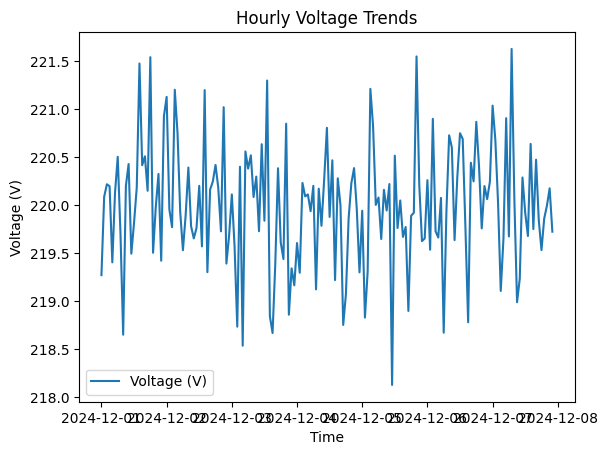

In [31]:
import matplotlib.pyplot as plt

df['Timestamp'] = pd.to_datetime(df['Timestamp'])
categorical_columns = df.select_dtypes(include=['object', 'category']).columns
df_numeric = df.drop(columns=categorical_columns)
hourly_data = df_numeric.resample('h', on='Timestamp').mean()

plt.plot(hourly_data.index, hourly_data['Voltage (V)'], label='Voltage (V)')
plt.title('Hourly Voltage Trends')
plt.xlabel('Time')
plt.ylabel('Voltage (V)')
plt.legend()
plt.show()


In [32]:
df['Humidity_Category'] = pd.cut(df['Humidity (%)'],
                                   bins=[30, 50, 60, 70],
                                   labels=[0, 1, 2])


In [35]:

numerical_df = df.select_dtypes(include=['number'])
correlation_matrix = numerical_df.corr()
print(correlation_matrix)



                   Voltage (V)  Current (I)  Power (W)  Power_Factor  \
Voltage (V)           1.000000    -0.004606   0.160885     -0.007027   
Current (I)          -0.004606     1.000000   0.846717     -0.023089   
Power (W)             0.160885     0.846717   1.000000     -0.016180   
Power_Factor         -0.007027    -0.023089  -0.016180      1.000000   
Temperature (°C)     -0.005452    -0.005789  -0.007317     -0.004055   
Humidity (%)          0.011147     0.009675   0.023449     -0.018476   
Energy_Efficiency     0.159558     0.840062   0.993062      0.093168   

                   Temperature (°C)  Humidity (%)  Energy_Efficiency  
Voltage (V)               -0.005452      0.011147           0.159558  
Current (I)               -0.005789      0.009675           0.840062  
Power (W)                 -0.007317      0.023449           0.993062  
Power_Factor              -0.004055     -0.018476           0.093168  
Temperature (°C)           1.000000     -0.014299          -0.007826

In [36]:
import seaborn as sns

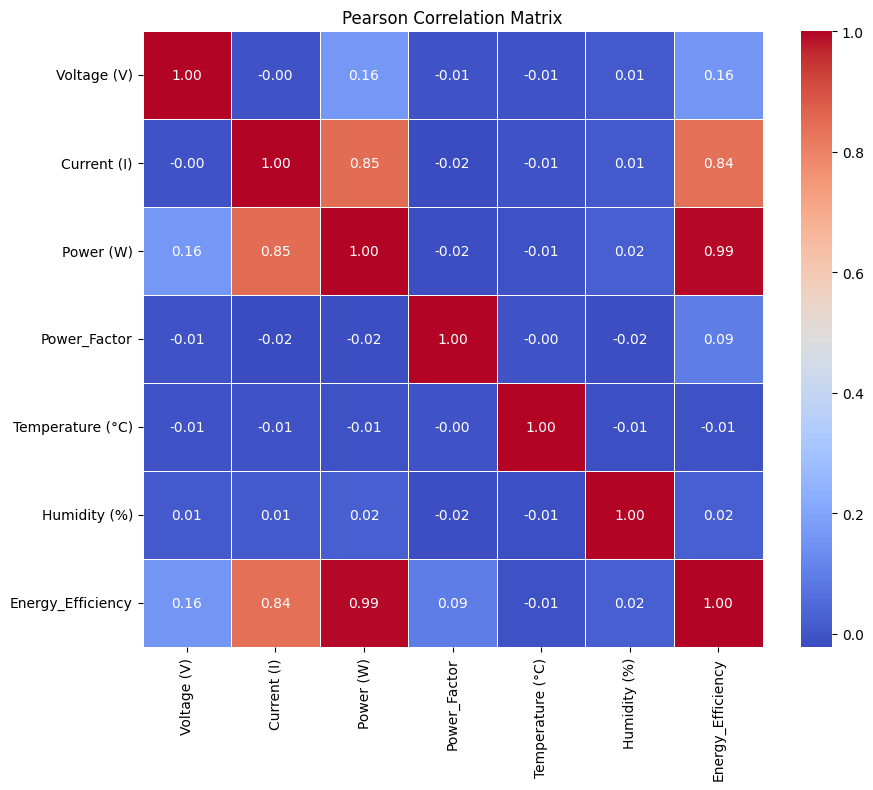

In [37]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Pearson Correlation Matrix')
plt.show()

In [38]:
from sklearn.model_selection import train_test_split
X = df.drop(columns=['Power (W)'])
y = df['Power (W)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build PyTorch model
import torch
import torch.nn as nn
model = nn.Sequential(nn.Linear(X_train.shape[1], 64),
                      nn.ReLU(),
                      nn.Linear(64, 1))
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)


In [45]:
X.to_csv(r"C:\Users\anany\Desktop\cleaned_data.csv", index=False)
X.to_csv('cleaned_data.csv', index=False)
import os
print(os.getcwd())



/content
